# task 7
**Develop A Neural Network That Can Read Handwriting:**
Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user- friendly interface that's ideal for beginners. Dataset can be seen on MNIST or can find
here.

Watch Tutorial: https://youtu.be/CBCfOTePVPo


In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Visualising the dataset**

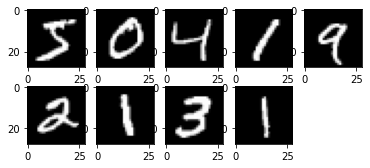

In [ ]:
for i in range(9):
    plt.subplot(350 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

**Reshaping the data**

In [ ]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

**Normalizing the data**

In [ ]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

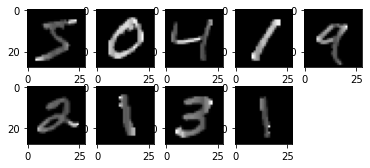

In [ ]:
for i in range(9):
  plt.subplot(350 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

**Creating a simple CNN Model**

In [ ]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


In [ ]:
model = model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 94s 49ms/step - loss: 0.1805 - accuracy: 0.9440
Epoch 2/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0718 - accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0526 - accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0437 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0374 - accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0315 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0274 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0258 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0216 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 78s 41m

In [ ]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

313/313 [==============================] - 4s 13ms/step - loss: 61.4292 - accuracy: 0.9483
Validation loss :  6142.920684814453 %
Validation accuracy :  94.83000040054321 %


**Saving the model**

In [ ]:
model.save('/content/drive/MyDrive/LGM neural network/Mnist.model')

**Predicting the random test cases**

313/313 [==============================] - 4s 13ms/step


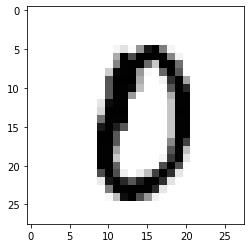

In [ ]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/LGM neural network/Mnist.model")
predictions = new_model.predict(X_test)
plt.imshow(X_test[55], cmap = plt.get_cmap('binary'))


In [ ]:
print("The prediction is : ", np.argmax(predictions[55]))

The prediction is :  0


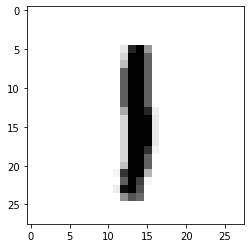

In [ ]:
plt.imshow(X_test[74], cmap = plt.get_cmap('binary'))


In [ ]:
print("The prediction is : ", np.argmax(predictions[74]))

The prediction is :  1
